In [1]:
from pandas import read_csv, DataFrame, concat
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import array, random, round, cumsum
import matplotlib.pyplot as plt
import seaborn

In [2]:
pizza_dataframe = read_csv("Pizza.csv", delimiter=",")
X_df_nostd = pizza_dataframe[pizza_dataframe.columns.difference(["brand", "id"])]

In [3]:
print("Correlation matrix")
X_df_nostd.corr()

Correlation matrix


,ash,cal,carb,fat,mois,prot,sodium
ash,1.000000,0.326468,-0.898988,0.791634,0.265556,0.823844,0.808122
cal,0.326468,1.000000,-0.023485,0.764567,-0.764441,0.070258,0.671958
carb,-0.898988,-0.023485,1.000000,-0.640238,-0.591802,-0.853542,-0.620176
fat,0.791634,0.764567,-0.640238,1.000000,-0.171318,0.498002,0.933325
mois,0.265556,-0.764441,-0.591802,-0.171318,1.000000,0.360248,-0.102279
prot,0.823844,0.070258,-0.853542,0.498002,0.360248,1.000000,0.429130
sodium,0.808122,0.671958,-0.620176,0.933325,-0.102279,0.429130,1.000000


In [4]:
print("Standaerd deviations")
X_df_nostd.std()

Standaerd deviations


ash        1.269724
cal        0.620034
carb      18.029722
fat        8.975658
mois       9.552987
prot       6.434392
sodium     0.370358
dtype: float64

In [5]:
X_df = DataFrame(StandardScaler().fit_transform(X_df_nostd), columns=X_df_nostd.columns)

In [6]:
print(f"Features are: {list(X_df.columns)}")
n_of_features = len(X_df.columns)
pca_exploratory = PCA(n_components=n_of_features)
principal_components_exploratory = pca_exploratory.fit(X_df)

Features are: ['ash', 'cal', 'carb', 'fat', 'mois', 'prot', 'sodium']


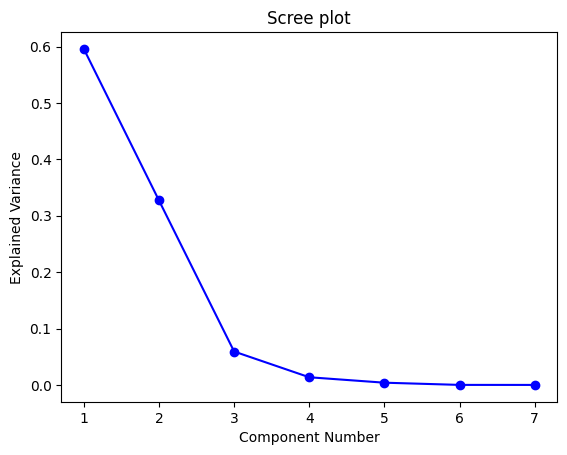

In [7]:
plt.plot(range(1, n_of_features+1), principal_components_exploratory.explained_variance_ratio_, "bo-")

plt.xlabel("Component Number")
plt.ylabel("Explained Variance")
plt.title("Scree plot")
plt.show()

In [8]:
print ("Proportion of Variance Explained : ", principal_components_exploratory.explained_variance_ratio_)  
    
out_sum = cumsum(principal_components_exploratory.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]
Cumulative Prop. Variance Explained:  [0.59596884 0.92317704 0.98240023 0.99599655 0.99995041 0.99999864
 1.        ]


In [9]:
y = pizza_dataframe.loc[:,["brand"]].values

n = 3
pca = PCA(n_components=n)
cols = [f"PC {i+1}" for i in range(n)]

principal_components = pca.fit_transform(X_df)
principal_df = DataFrame(data=principal_components, columns=cols)
final_df = concat([principal_df, pizza_dataframe["brand"]], axis=1)

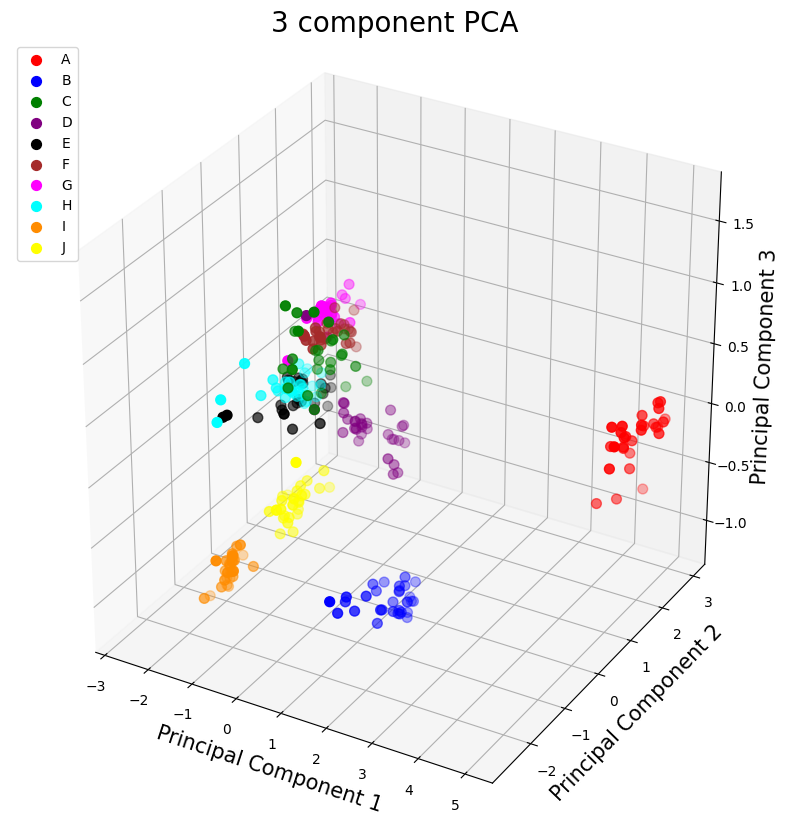

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title(f'{n} component PCA', fontsize = 20)
ax.set_box_aspect((1, 1, 1))

targets = list(final_df.brand.unique())
colors = {
    "A": "red",
    "B": "blue",
    "C": "green",
    "D": "purple",
    "E": "black",
    "F": "brown",
    "G": "fuchsia",
    "H": "cyan",
    "I": "darkorange",
    "J": "yellow",
}
for target in targets:
    indices_to_keep = final_df["brand"] == target
    data_to_show = [final_df.loc[indices_to_keep, f"PC {i}"] for i in range(1, n+1)] # coordinates to plot of PC1, PC2, ... PCn
    ax.scatter(*data_to_show, c=colors[target], s=50)

ax.legend(targets, loc="upper left")
ax.grid()

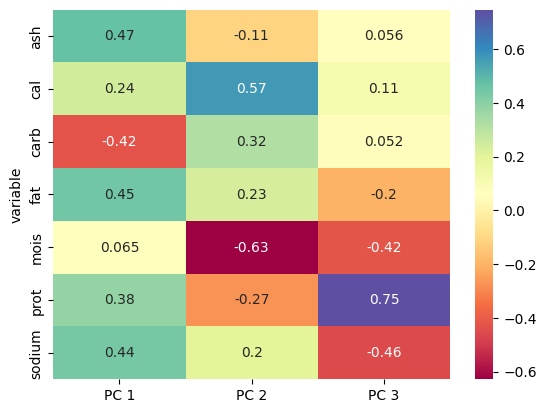

In [11]:
loadings = pca.components_
loadings_df = DataFrame.from_dict(dict(zip(cols, loadings)))
loadings_df["variable"] = X_df.columns.values
loadings_df = loadings_df.set_index("variable")

ax = seaborn.heatmap(loadings_df, annot=True, cmap="Spectral")
plt.show()